In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Load the dataset
data = pd.read_csv('WineQT.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Data preprocessing

In [4]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [5]:
# Basic data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [6]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


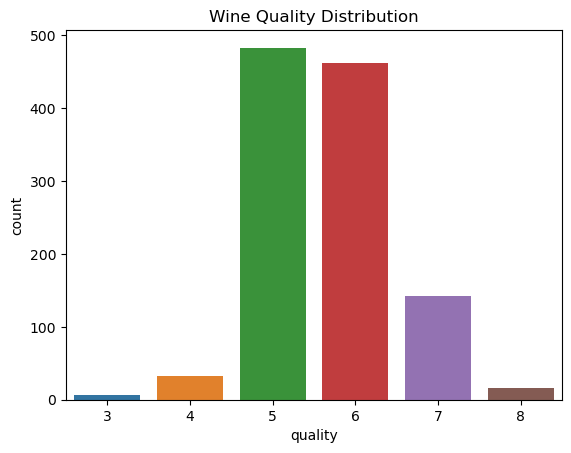

In [7]:
# Distribution of wine quality
sns.countplot(x='quality', data=data)
plt.title('Wine Quality Distribution')
plt.show()

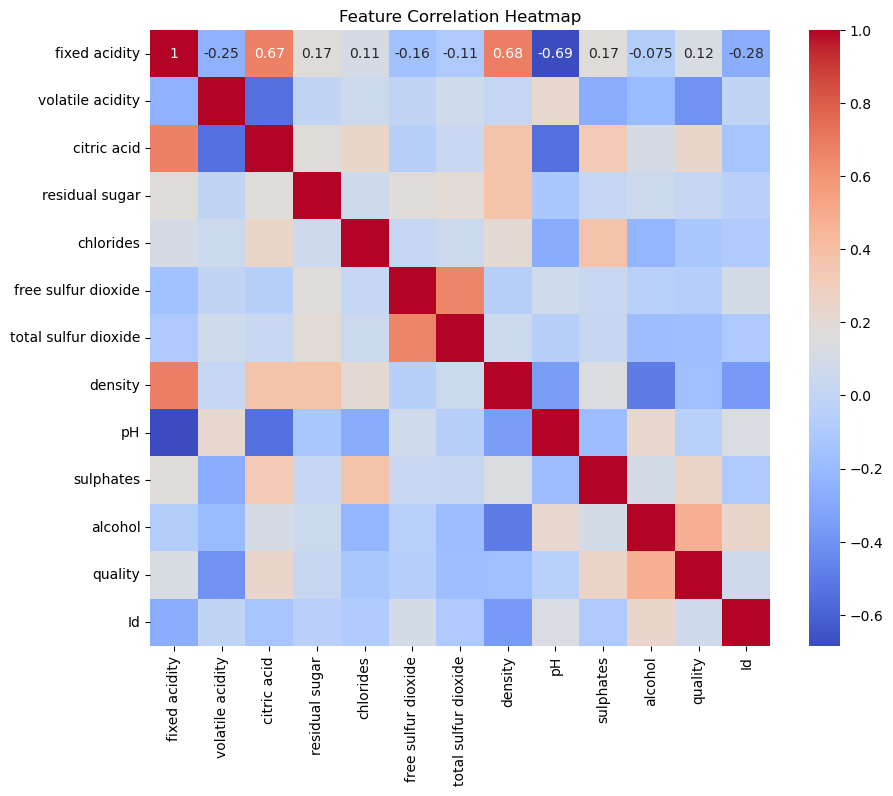

In [8]:
# Feature correlations heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Feature and target selection


In [9]:
X = data.drop('quality', axis=1)  # Features
y = data['quality']  # Target variable

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# 1. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6812227074235808
Random Forest Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest CV Accuracy:", rf_cv_scores.mean())


Random Forest CV Accuracy: 0.5372060062820807


In [13]:
# 2. Stochastic Gradient Descent (SGD) Classifier
sgd_model = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)
print("SGD Classifier Accuracy:", accuracy_score(y_test, y_pred_sgd))
print("SGD Classification Report:\n", classification_report(y_test, y_pred_sgd))


SGD Classifier Accuracy: 0.5327510917030568
SGD Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.74      0.33      0.46        96
           6       0.48      0.91      0.63        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.53       229
   macro avg       0.25      0.25      0.22       229
weighted avg       0.52      0.53      0.47       229



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Cross-validation for SGD Classifier
sgd_cv_scores = cross_val_score(sgd_model, X, y, cv=5)
print("SGD CV Accuracy:", sgd_cv_scores.mean())


SGD CV Accuracy: 0.3410058990270436


In [15]:
# 3. Support Vector Classifier (SVC)
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))


SVC Accuracy: 0.49344978165938863
SVC Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.49      0.64      0.55        96
           6       0.50      0.53      0.51        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.49       229
   macro avg       0.20      0.23      0.21       229
weighted avg       0.42      0.49      0.45       229



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Cross-validation for SVC
svc_cv_scores = cross_val_score(svc_model, X, y, cv=5)
print("SVC CV Accuracy:", svc_cv_scores.mean())


SVC CV Accuracy: 0.41820271202022524


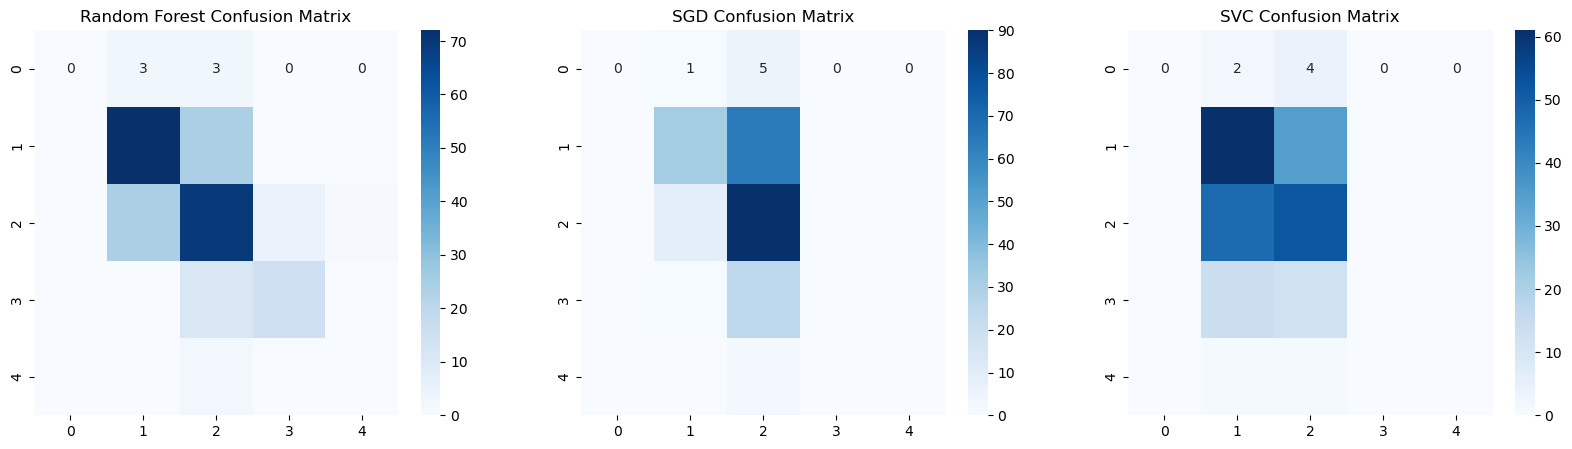

In [17]:
# Confusion Matrices for each model
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=axs[0], cmap='Blues')
axs[0].set_title('Random Forest Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_pred_sgd), annot=True, fmt='d', ax=axs[1], cmap='Blues')
axs[1].set_title('SGD Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', ax=axs[2], cmap='Blues')
axs[2].set_title('SVC Confusion Matrix')

plt.show()